# テイラー展開

- モデルの任意の点近傍の振る舞いを近似する方法

# 用途

- 反復的にパラメータを更新するときに，どの方向にどのくらい変化させたらいいかを調べる

- 非線形モデルを線形モデルに近似する(拡張カルマンフィルタ)

# 式(2次の項まで)

- 1変数の場合

  関数$f(x)$を点$x_{a}$についてテイラー展開する場合

$$
f(x) = f(x_{a}) + \frac{d}{dx} f(x_{a})(x - x_{a}) + \frac{1}{2} \frac{d^{2}}{d^{2}x} f(x_{a}) (x - x_{a})^2 + \cdots
$$

- 多変数の場合

$$
f(x) = f(\vec{x_{a}}) + \nabla f(x_{a})(\vec{x} - \vec{x_{a}}) + \frac{1}{2} (\vec{x} - \vec{x_{a}})^{\mathrm{T}}\nabla^{2}f(x_{a}) (\vec{x} - \vec{x_{a}}) + \cdots
$$

# 1変数の場合の例を見ていく

こんな式を考えよう

$$
f(x) = 3x^{3} + 2x^{2} - 5x + 9
$$

とりあえずプロット

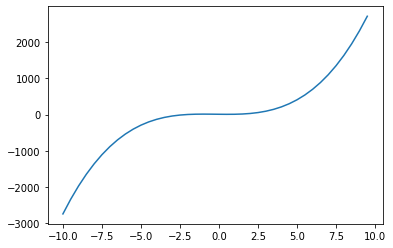

In [6]:
import matplotlib.pyplot as plt
import numpy as np

xs = [x for x in np.arange(-10., 10., 0.5)]
f = lambda x: 3. * x**3 + 2 * x**2 - 5 * x + 9
fxs = [f(x) for x in xs]

plt.plot(xs, fxs)
plt.show()

次に導関数を求める

$$
\frac{d}{dx} f(x) = 9x^{2} + 4x - 5
$$
$$
\frac{d^{2}}{d^{2}x} f(x) = 18x + 4
$$

$x_{a} = 5$とすると

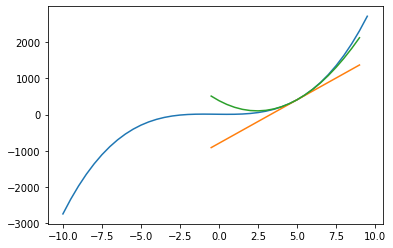

In [17]:
# 導関数オブジェクト
dfdx = lambda x: 9. * x**2 + 4. * x - 5.
d2fd2x = lambda x: 18. * x + 4.

# テイラー展開(1次と2次)
xa = 5.
f_xa_dx_1 = lambda x, xa: f(xa) + dfdx(xa) * (x - xa)
f_xa_dx_2 = lambda x, xa: f_xa_dx_1(x, xa) + 0.5 * d2fd2x(xa) * (x - xa)**2

# 出力
f_xa_dx_1_out = [f_xa_dx_1(x, xa) for x in xs[19:39]]
f_xa_dx_2_out = [f_xa_dx_2(x, xa) for x in xs[19:39]]

plt.plot(xs, fxs)
plt.plot(xs[19:39], f_xa_dx_1_out)
plt.plot(xs[19:39], f_xa_dx_2_out)
plt.show()

見てわかるように，$x = x_{a}$近傍では，もとの式をよく近似していることがわかる